In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import os

plt.style.use(['science', 'notebook', 'grid'])

In [26]:
#loading contact force data
master_dir = 'C:\\Users\\paudy\\OneDrive\\Documents\\ContactChain_out_0.7mu'

df = {}

for i in range(27, 36):
    file_name = f'Contact_pairs_00{i}.csv'

    file_path = os.path.join(master_dir, file_name)
    df[file_name] = pd.read_csv(file_path)

#extracting bottom_particles and bottom analytical boundary contact for all dataframes
def apply_filters(df):
    return df[(df['contact_type'] == 'SA') & (df['B'] == 908) & (df['Z'] <= -0.27)]

# Apply the filters to all DataFrames in the dictionary
filtered_df = {key: apply_filters(dataframe) for key, dataframe in df.items()}

In [27]:
#extracting the contact forces before application of the external load 
reference_file_name = 'Contact_pairs_0024.csv'
reference_file = os.path.join(master_dir, reference_file_name)
df_ref = pd.read_csv(reference_file)

df_ref_filt = apply_filters(df_ref)

x_coords = df_ref_filt['X'].tolist()
y_coords_init = df_ref_filt['f_z'].tolist()

column_values_dict = {key: dataframe['f_z'].tolist() for key, dataframe in filtered_df.items()}

y_coords = {key: [val - y_init for val, y_init in zip(values, y_coords_init)] for key, values in column_values_dict.items()}

Text(0, 0.5, 'delta f_z (N)')

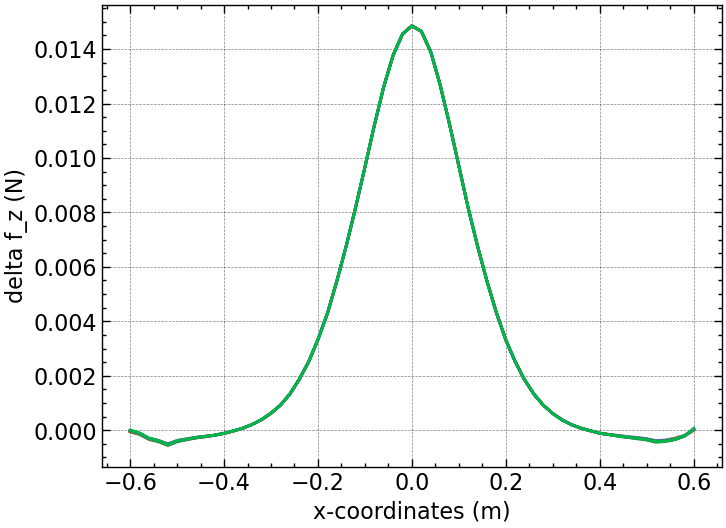

In [28]:
for key in y_coords.keys():
    plt.plot(x_coords, y_coords[key], label=key)

#plt.legend()
plt.xlabel('x-coordinates (m)')
plt.ylabel('delta f_z (N)')